In [1]:
import pandas as pd
#数据加载
train = pd.read_csv('train.csv')
print(train.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [2]:
#转换为Pandas日期格式
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
#把Datetime作为train的索引
train.index = train.Datetime
print(train.head())

                     ID            Datetime  Count
Datetime                                          
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2


In [3]:
#去掉Datetime和ID字段
train.drop(['ID','Datetime'],axis =1,inplace = True)
print(train.head())


                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [4]:
#按照天进行采样
daily_train = train.resample('D').sum()
print(daily_train.head())
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis=1,inplace = True)
print(daily_train.head())


            Count
Datetime         
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60
                   ds   y
Datetime                 
2012-08-25 2012-08-25  76
2012-08-26 2012-08-26  88
2012-08-27 2012-08-27  62
2012-08-28 2012-08-28  58
2012-08-29 2012-08-29  60


In [5]:
from fbprophet import Prophet
#拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
#打印预测结果
print(forecast)



INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -686.475171  -2204.179517     62.422913   -686.475171   
1   2012-08-26   -678.372660  -2314.399620    -55.862702   -678.372660   
2   2012-08-27   -670.270149   -782.839011   1468.398021   -670.270149   
3   2012-08-28   -662.167638   -686.017475   1668.925592   -662.167638   
4   2012-08-29   -654.065127   -686.651205   1579.792140   -654.065127   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16243.879057  15216.874927  17760.875206  15816.482823   
971 2015-04-23  16271.394404  15147.849916  17609.119606  15841.958391   
972 2015-04-24  16298.909751  14841.645058  17339.102521  15867.253510   
973 2015-04-25  16326.425097  13737.566709  16225.614951  15890.222006   
974 2015-04-26  16353.940444  13435.973031  16082.185923  15912.540965   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -686.475171     -422.261

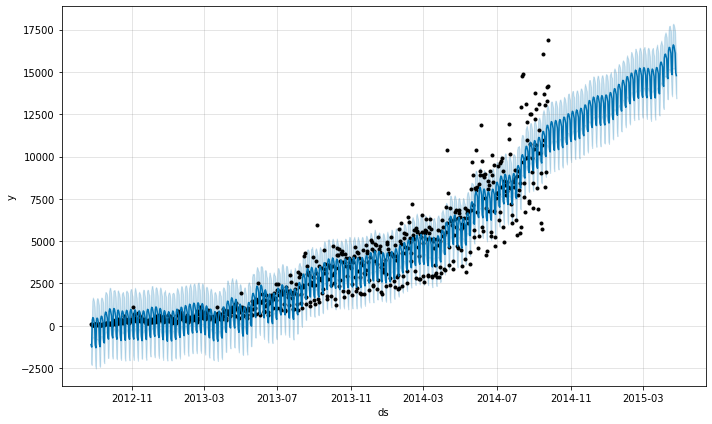

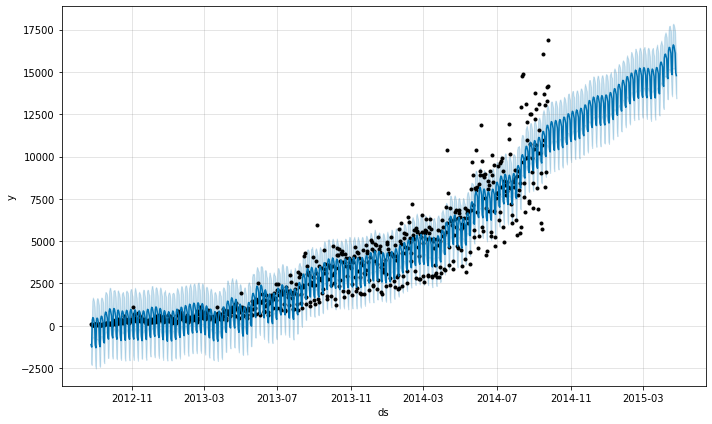

In [6]:
#绘制预测结果
m.plot(forecast)

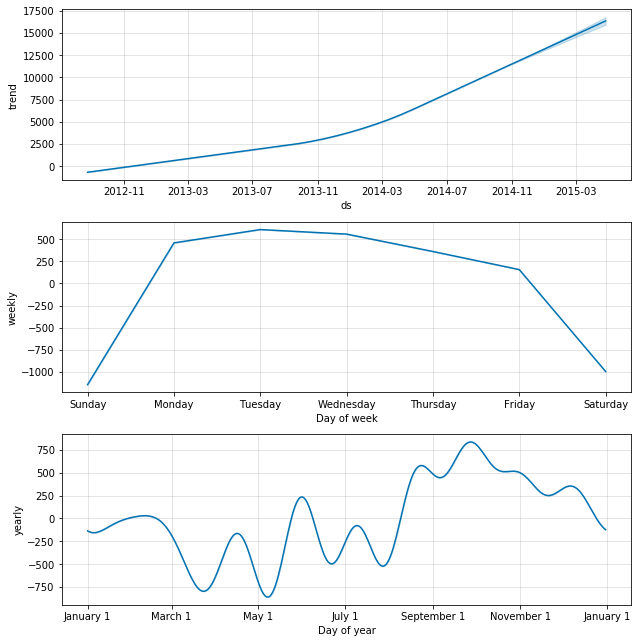

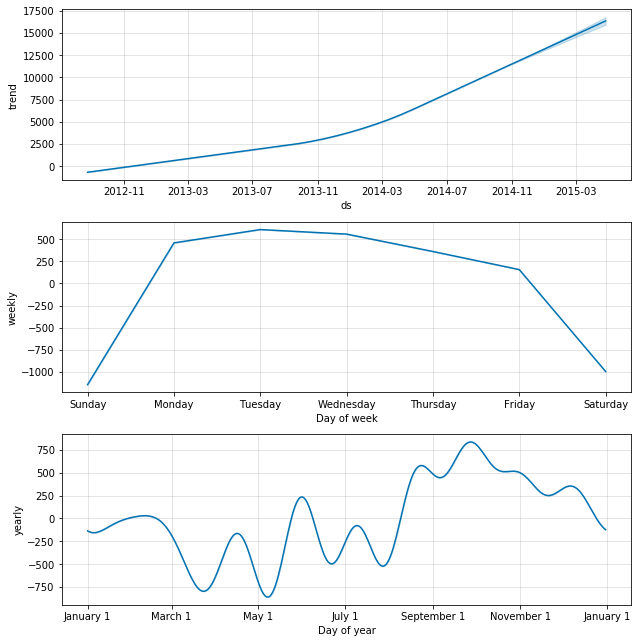

In [7]:
#查看各个构成成分
m.plot_components(forecast)